In [1]:
import numpy as np
import matplotlib.pyplot as plt
from umap import UMAP  # Correct import for UMAP
from sklearn.manifold import TSNE
from scipy.stats import poisson

/home/rk/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-11-22 15:20:36.642077: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-22 15:20:36.678880: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-22 15:20:36.678912: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-22 15:20:36.691295: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimiz

In [2]:
# PCA Implementation
def perform_pca(data):
    # Step 1: Normalize the data (zero mean)
    mean = np.mean(data, axis=0)
    data_centered = data - mean
    
    # Step 2: Compute the covariance matrix
    cov_matrix = np.cov(data_centered, rowvar=False)
    
    # Step 3: Perform eigendecomposition
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
    
    # Step 4: Sort eigenvectors by eigenvalues in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]
    
    return eigenvalues, eigenvectors, data_centered

In [3]:
# EM Algorithm for Poisson Mixture Model
def em_algorithm(data, num_iterations=100):
    # Initialize parameters
    pi = 0.5  # Proportion of families with family planning
    lambda1 = np.mean(data) * 0.8  # Initial guess for mean with planning
    lambda2 = np.mean(data) * 1.2  # Initial guess for mean without planning
    
    for _ in range(num_iterations):
        # E-step: Calculate responsibilities
        r1 = pi * poisson.pmf(data, lambda1)
        r2 = (1 - pi) * poisson.pmf(data, lambda2)
        responsibilities = r1 / (r1 + r2)
        
        # M-step: Update parameters
        pi = np.mean(responsibilities)
        lambda1 = np.sum(responsibilities * data) / np.sum(responsibilities)
        lambda2 = np.sum((1 - responsibilities) * data) / np.sum(1 - responsibilities)
    
    return pi, lambda1, lambda2

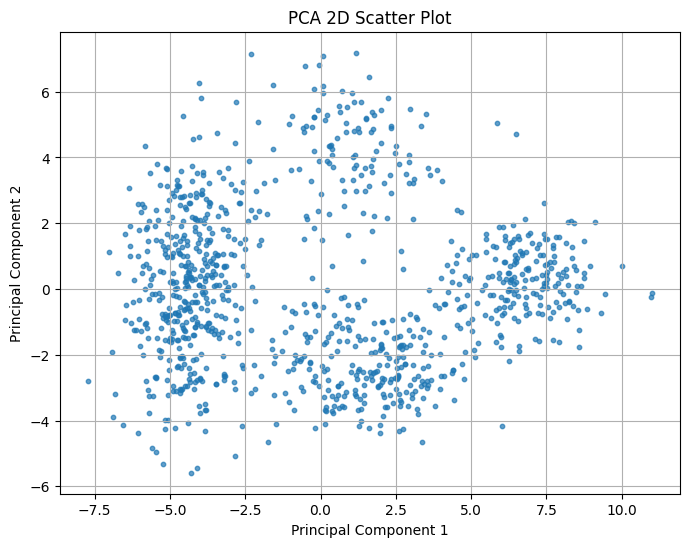

/home/rk/.local/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


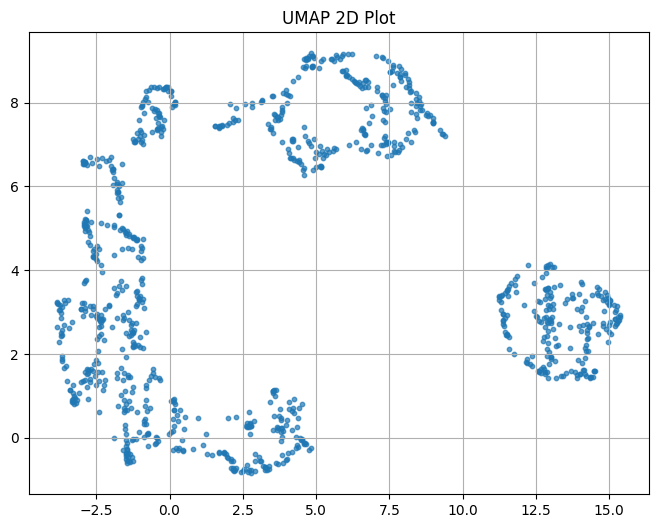

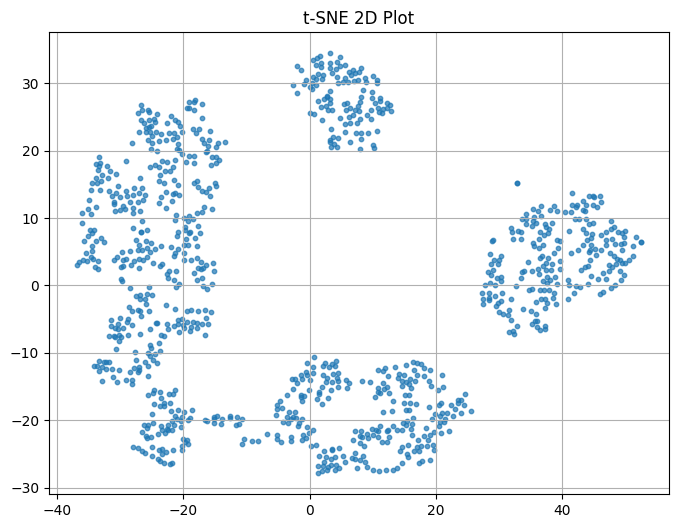

In [4]:



# Load PCA dataset
pca_data = np.loadtxt('pca_data.txt')



# PCA projection and 2D scatter plot
eigenvalues, eigenvectors, data_centered = perform_pca(pca_data)
projected_data = np.dot(data_centered, eigenvectors[:, :2])  # Project onto top 2 eigenvectors

plt.figure(figsize=(8, 6))
plt.scatter(projected_data[:, 0], projected_data[:, 1], s=10, alpha=0.7)
plt.title("PCA 2D Scatter Plot")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()

# UMAP and t-SNE plots
umap_data = UMAP(n_components=2, random_state=42).fit_transform(pca_data)
tsne_data = TSNE(n_components=2, random_state=42).fit_transform(pca_data)

# UMAP Plot
plt.figure(figsize=(8, 6))
plt.scatter(umap_data[:, 0], umap_data[:, 1], s=10, alpha=0.7)
plt.title("UMAP 2D Plot")
plt.grid(True)
plt.show()

# t-SNE Plot
plt.figure(figsize=(8, 6))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], s=10, alpha=0.7)
plt.title("t-SNE 2D Plot")
plt.grid(True)
plt.show()




In [5]:
# Load EM dataset
em_data = np.loadtxt('em_data.txt')



# Run EM algorithm
pi, lambda1, lambda2 = em_algorithm(em_data)

print(f"Proportion of families with family planning: {pi:.3f}")
print(f"Proportion of families without family planning: {1 - pi:.3f}")
print(f"Mean number of children with family planning: {lambda1:.3f}")
print(f"Mean number of children without family planning: {lambda2:.3f}")

Proportion of families with family planning: 0.357
Proportion of families without family planning: 0.643
Mean number of children with family planning: 1.785
Mean number of children without family planning: 4.913
